In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('Downloads/master.csv');

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
data.shape

(27820, 12)

In [6]:
len(data)

27820

In [7]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
# To make sure we have no missing value in our data, we can the 'fillna' command for that.
data = data.fillna(0)
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [10]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [11]:
data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [12]:
data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [13]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
country,0,0.0
year,0,0.0
sex,0,0.0
age,0,0.0
suicides_no,0,0.0
population,0,0.0
suicides/100k pop,0,0.0
country-year,0,0.0
HDI for year,0,0.0
gdp_for_year ($),0,0.0


In [14]:
data['suicides_no'] = data['suicides_no']

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,20996,9
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,5-14 years
suicides_no,22338,0
population,19044200,311000
suicides/100k pop,117.3,0.0
country-year,Russian Federation1994,Albania1987
HDI for year,0.0,0.0
gdp_for_year ($),"395,077,301,248","2,156,624,900"


In [15]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,9,20996
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,5-14 years,35-54 years
suicides_no,0,22338
population,311000,19044200
suicides/100k pop,0.0,117.3
country-year,Albania1987,Russian Federation1994
HDI for year,0.0,0.0
gdp_for_year ($),"2,156,624,900","395,077,301,248"


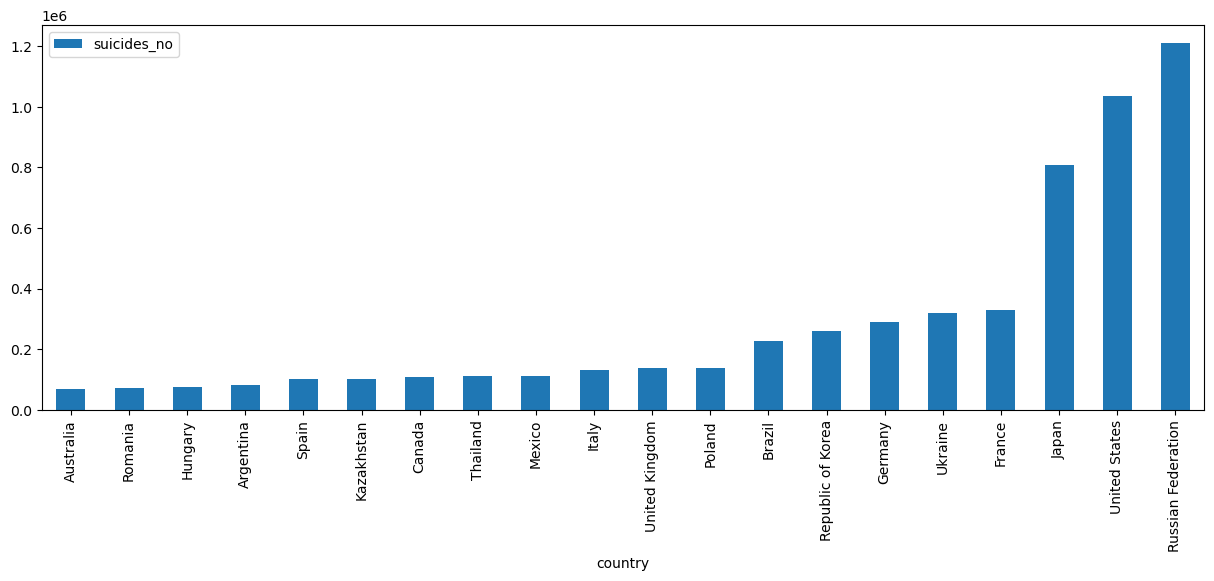

In [16]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(20).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

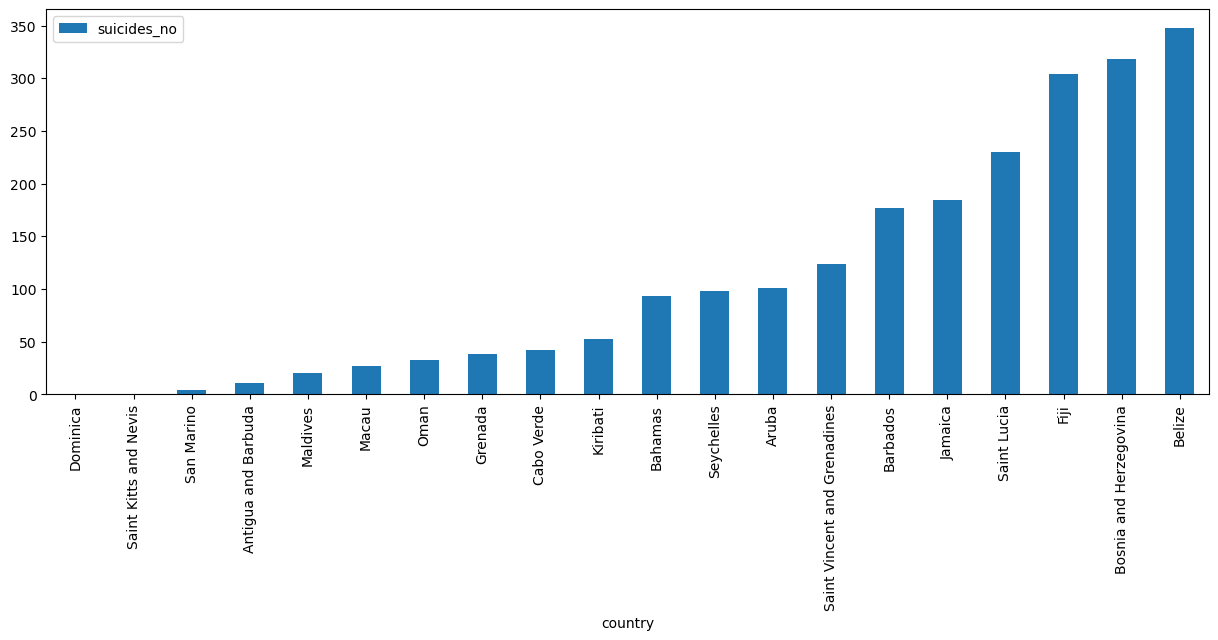

In [17]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).head(20).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

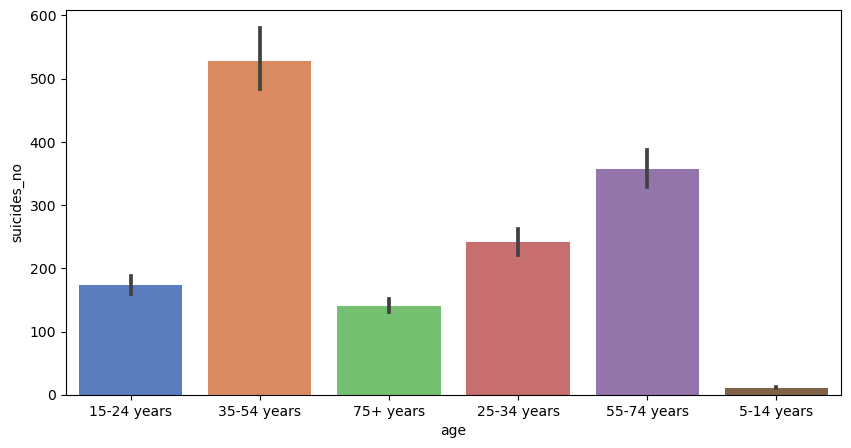

In [18]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

Text(4.944444444444445, 0.5, 'Suicide Count')

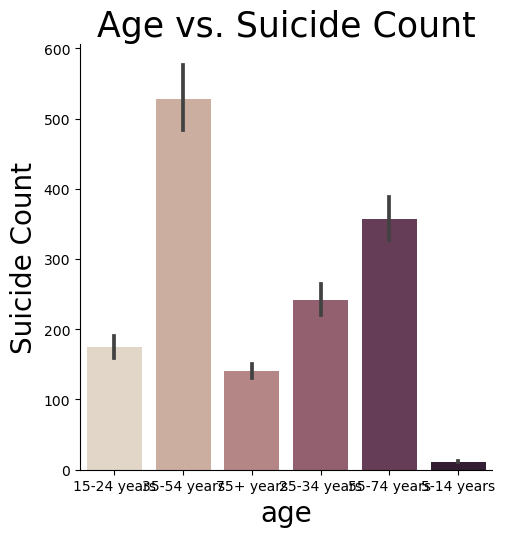

In [21]:
sns.catplot(x="age", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('age',size=20)
plt.ylabel('Suicide Count',size=20)

<function matplotlib.pyplot.show(close=None, block=None)>

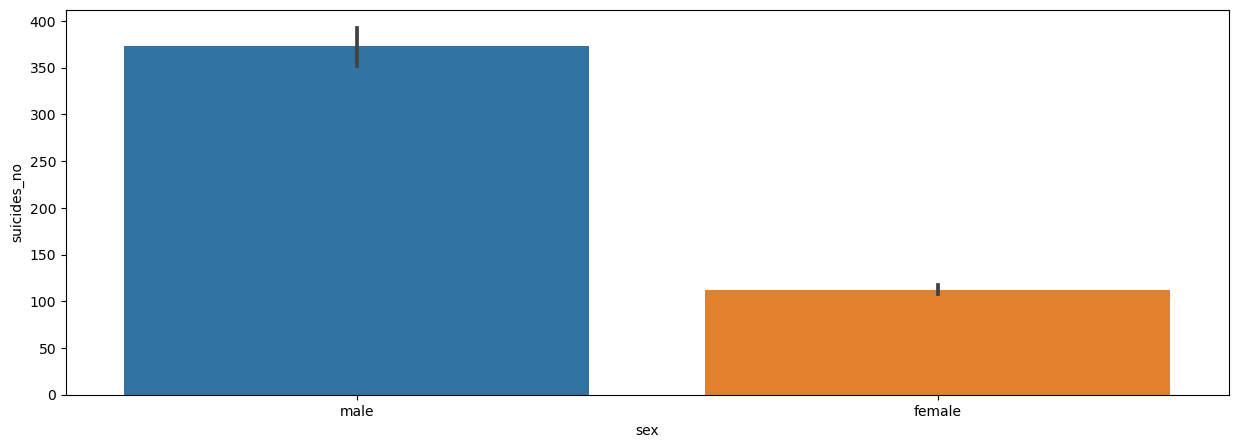

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex', y='suicides_no', data=data);
plt.show

In [23]:
data['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

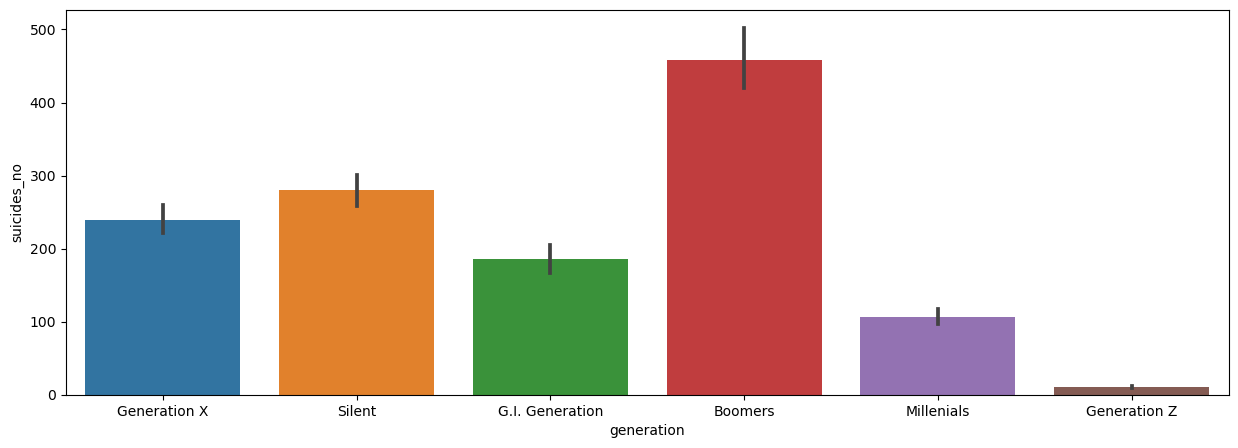

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='generation', y='suicides_no', data=data);
plt.show

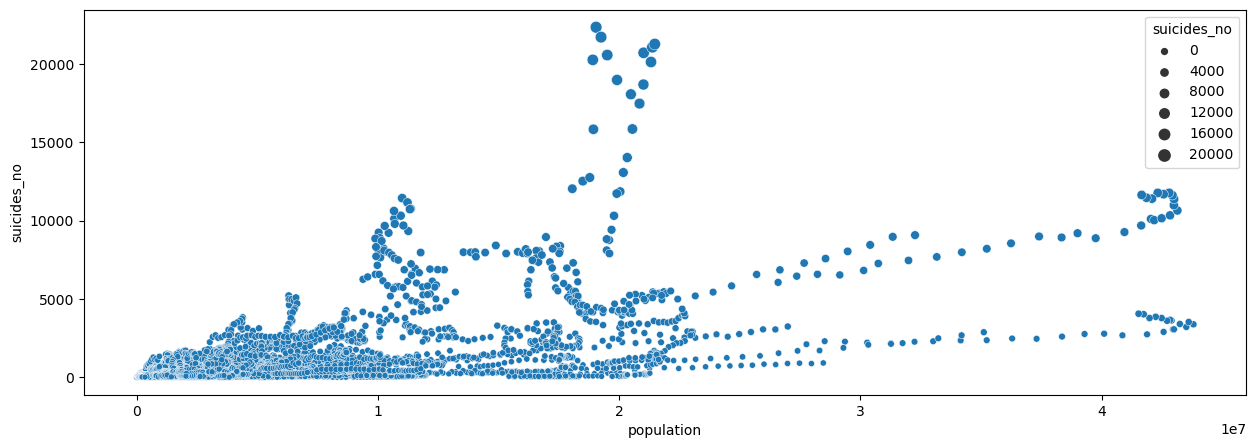

In [33]:
figure = plt.figure(figsize=(15,5))
sns.scatterplot(x=data['population'],y='suicides_no', data=data, size = "suicides_no") 
plt.show()

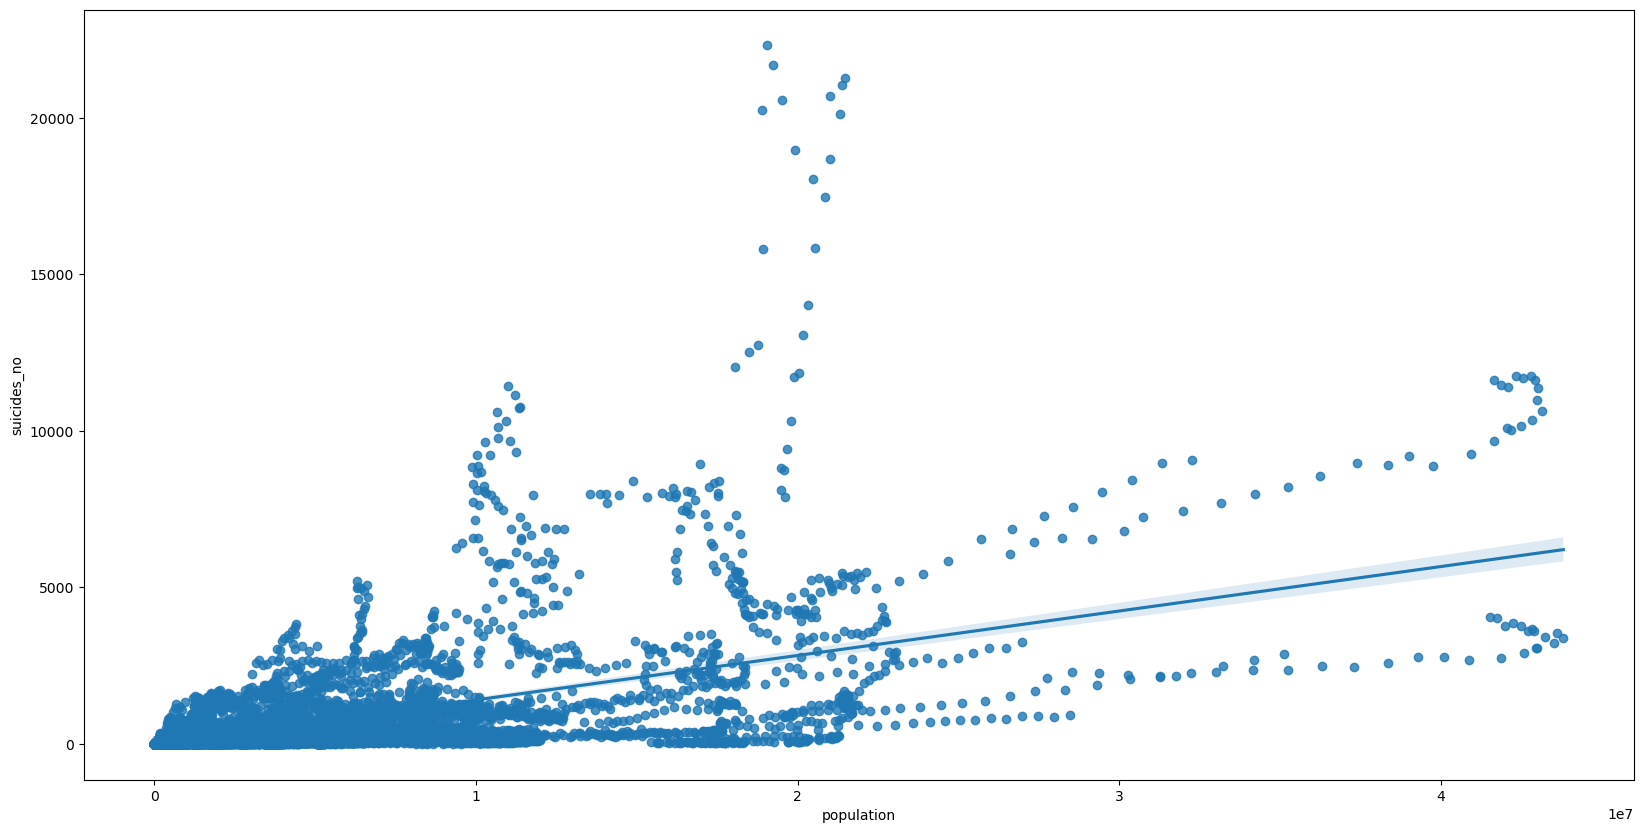

In [36]:
figure = plt.figure(figsize=(20,10))
sns.regplot(x='population', y='suicides_no', data=data);

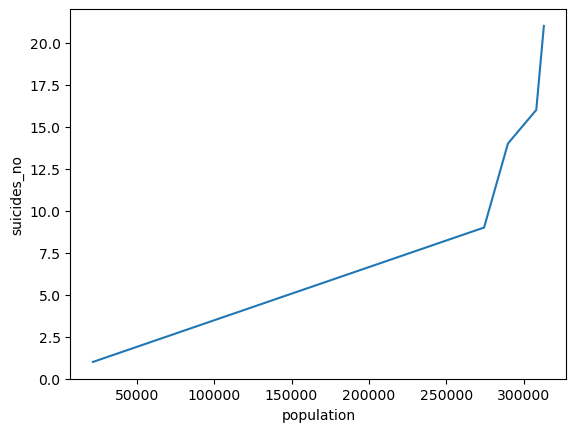

In [46]:
sns.lineplot(x='population', y='suicides_no', data=data.head());

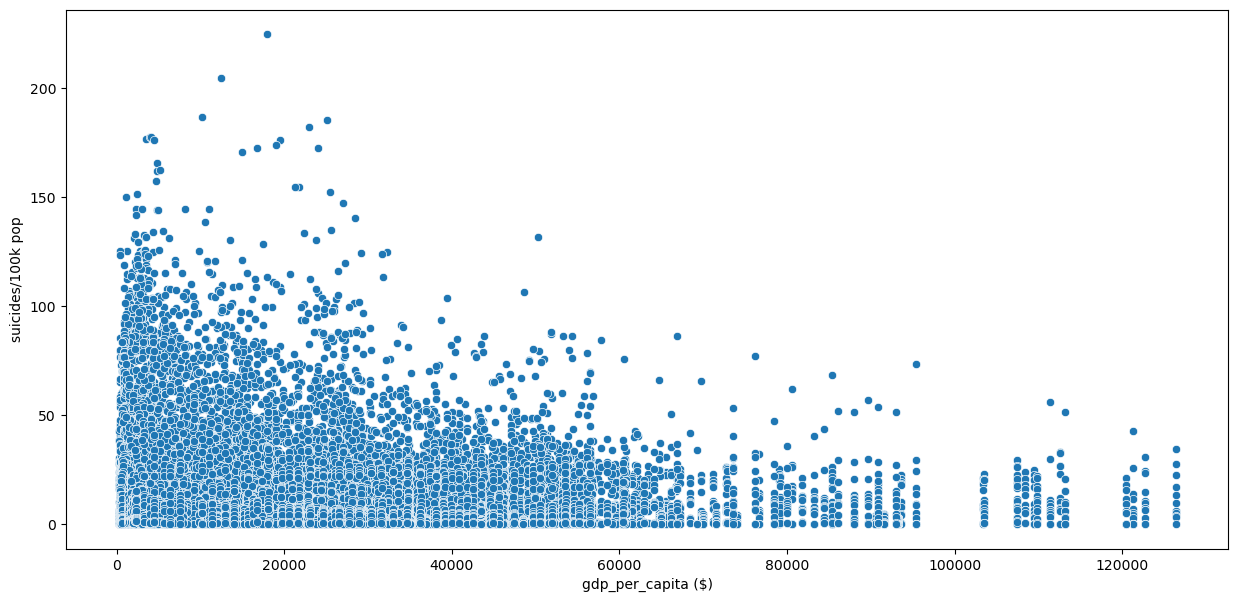

In [48]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data) # scatter plot 
plt.show()

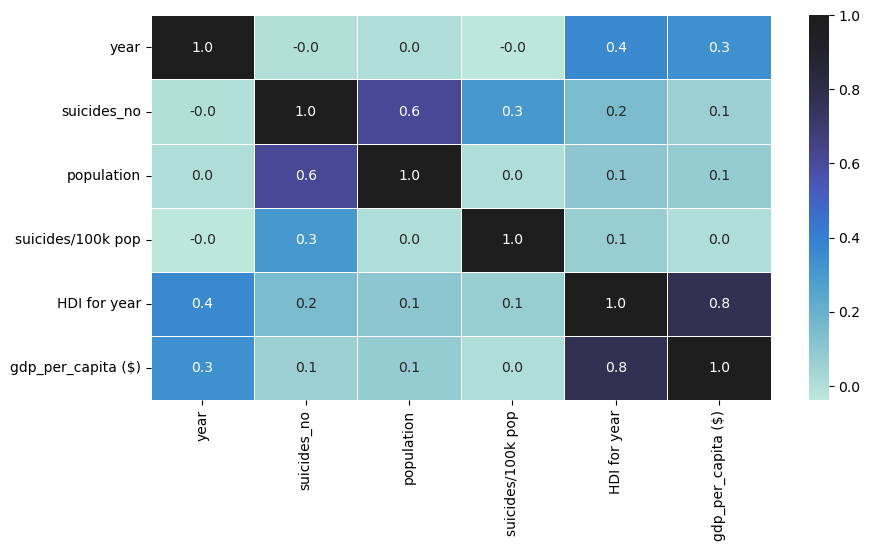

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

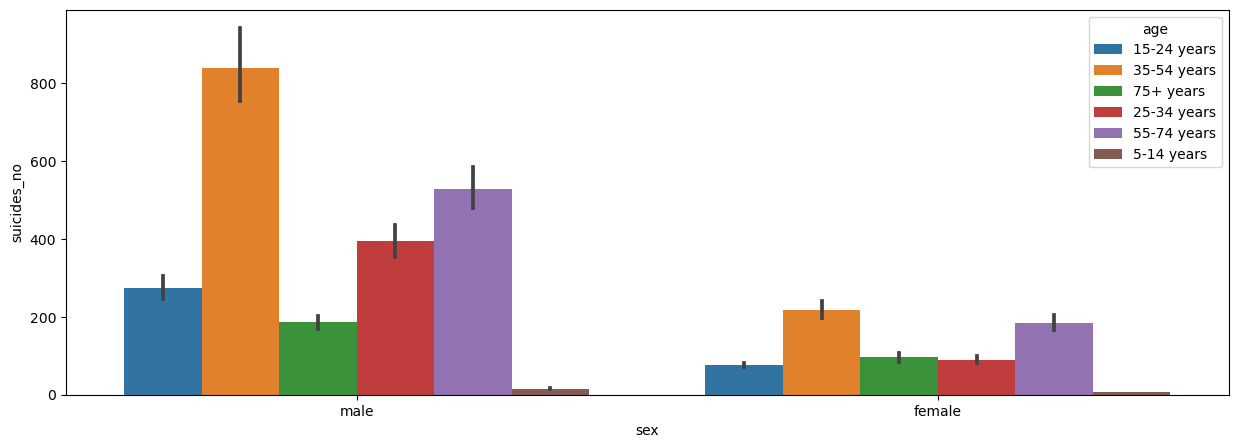

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex', y='suicides_no', hue='age', data=data);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

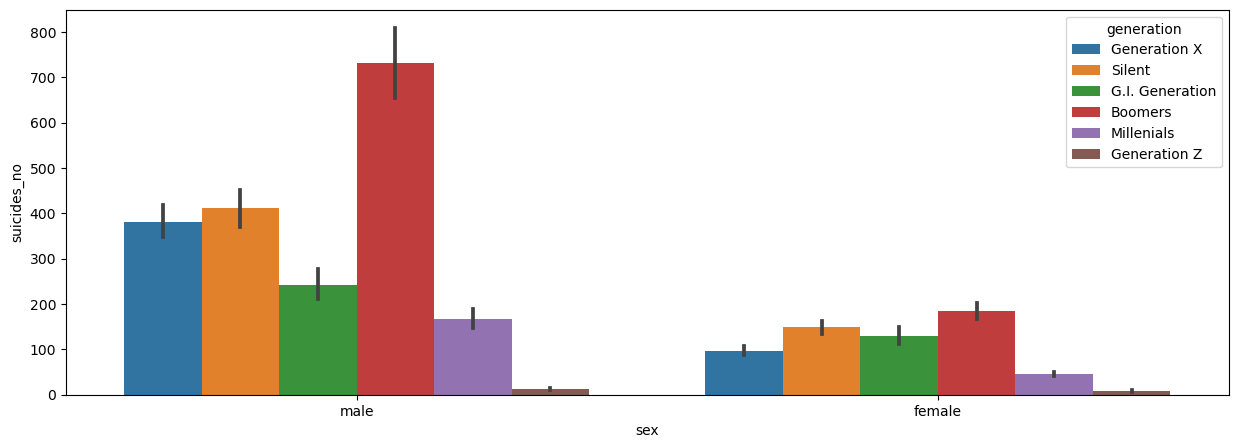

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex', y='suicides_no', hue='generation', data=data);
plt.show

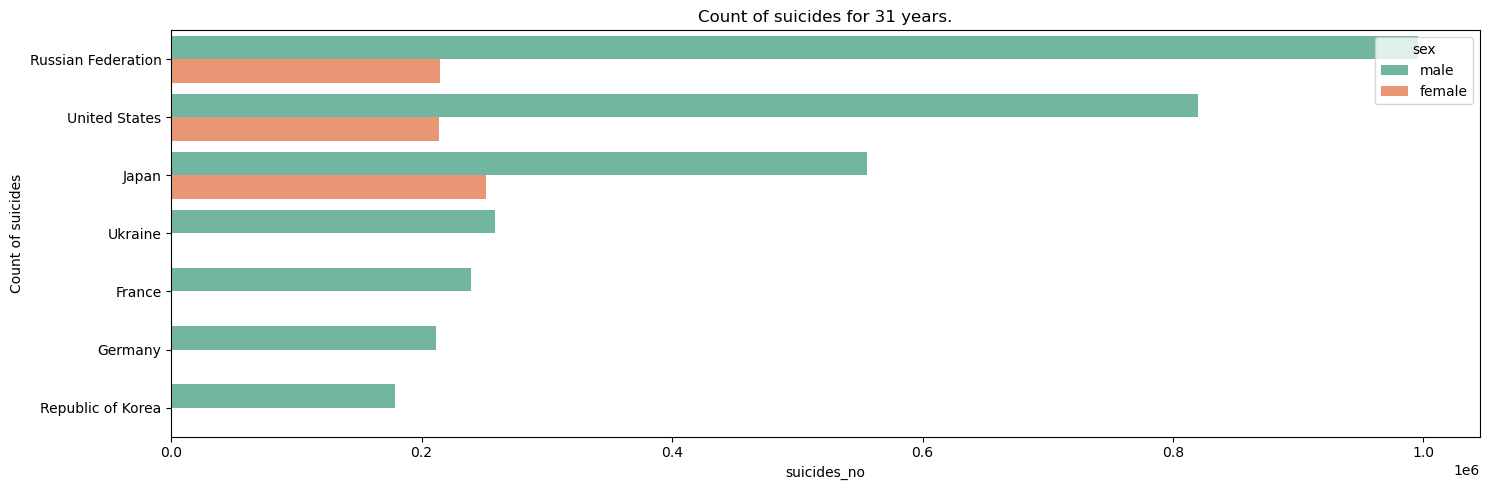

In [52]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

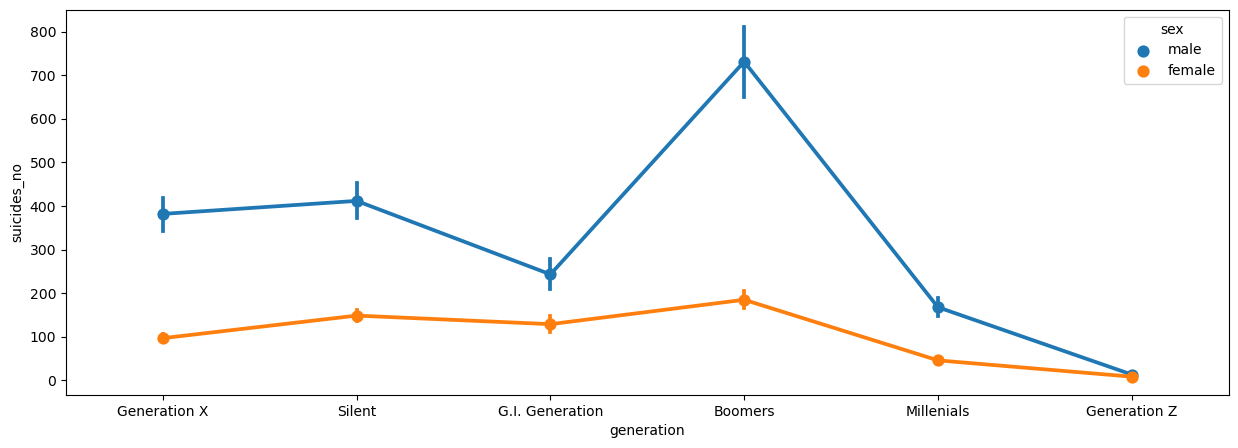

In [53]:
plt.figure(figsize=(15,5))
sns.pointplot(x='generation', y='suicides_no', hue='sex', data=data);
plt.show()

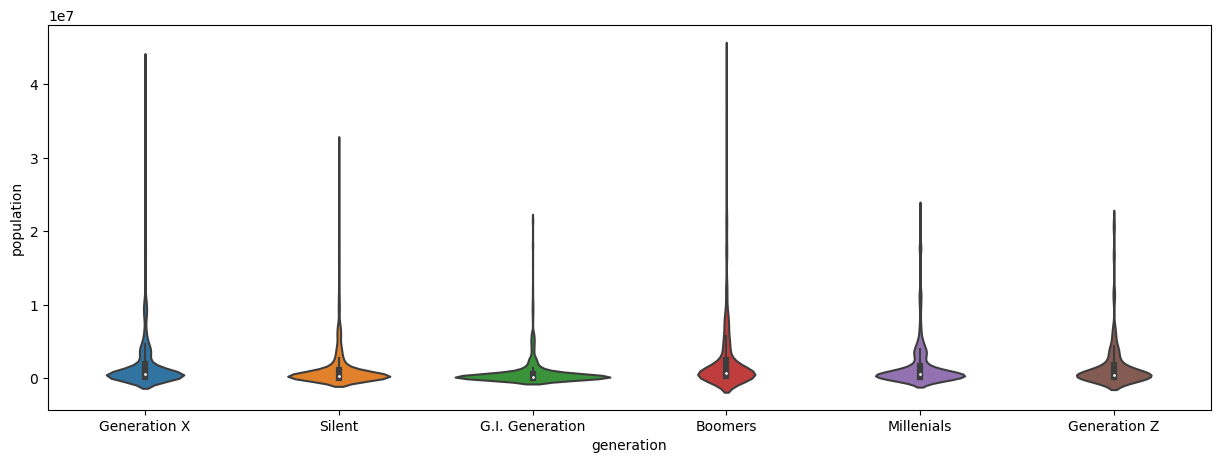

In [55]:
plt.figure(figsize=(15,5))
sns.violinplot(x='generation', y='population', data=data);
plt.show()

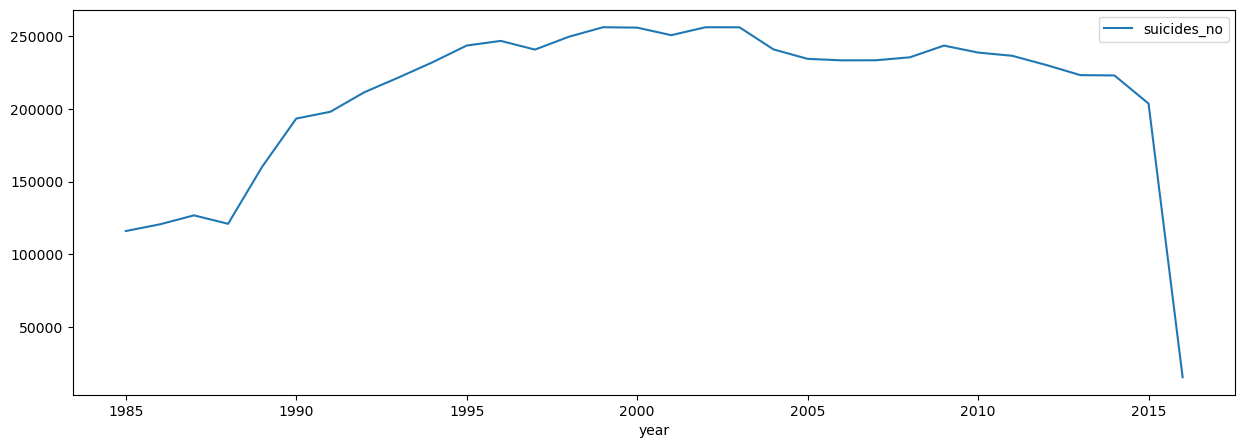

In [56]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()


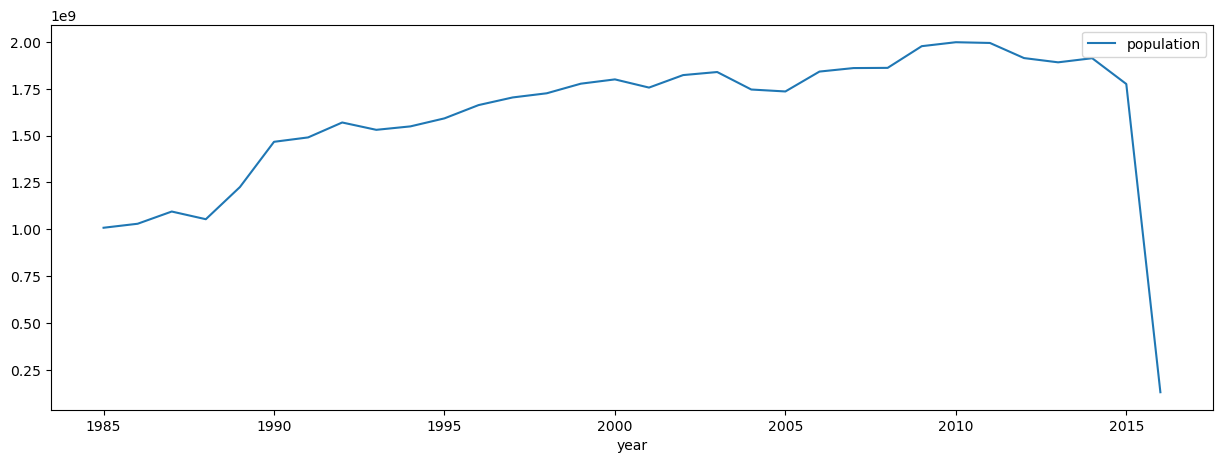

In [57]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

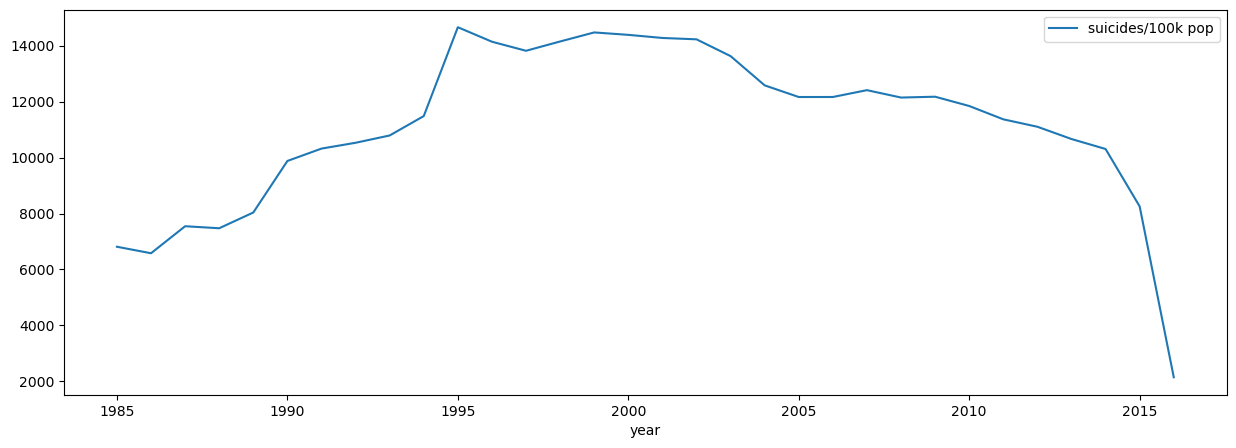

In [58]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()